In [1]:
# Import our main data library
import pandas as pd

# Load the dataset from the file in our folder
df = pd.read_csv('creditcard.csv')

# Print the first 5 rows to make sure it loaded
print("--- Data Loaded Successfully ---")
print(df.head())

# Print the class distribution (the most important part)
print("\n--- Class Distribution ---")
print(df['Class'].value_counts())

--- Data Loaded Successfully ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   


--- Visualizing Class Imbalance ---


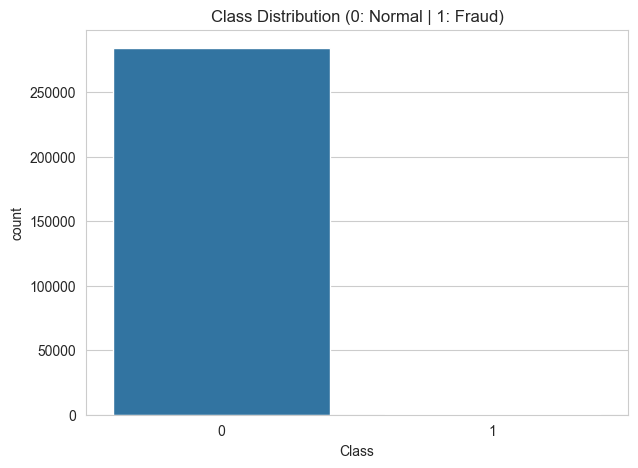


--- Visualizing Transaction Amount for Normal vs. Fraud ---


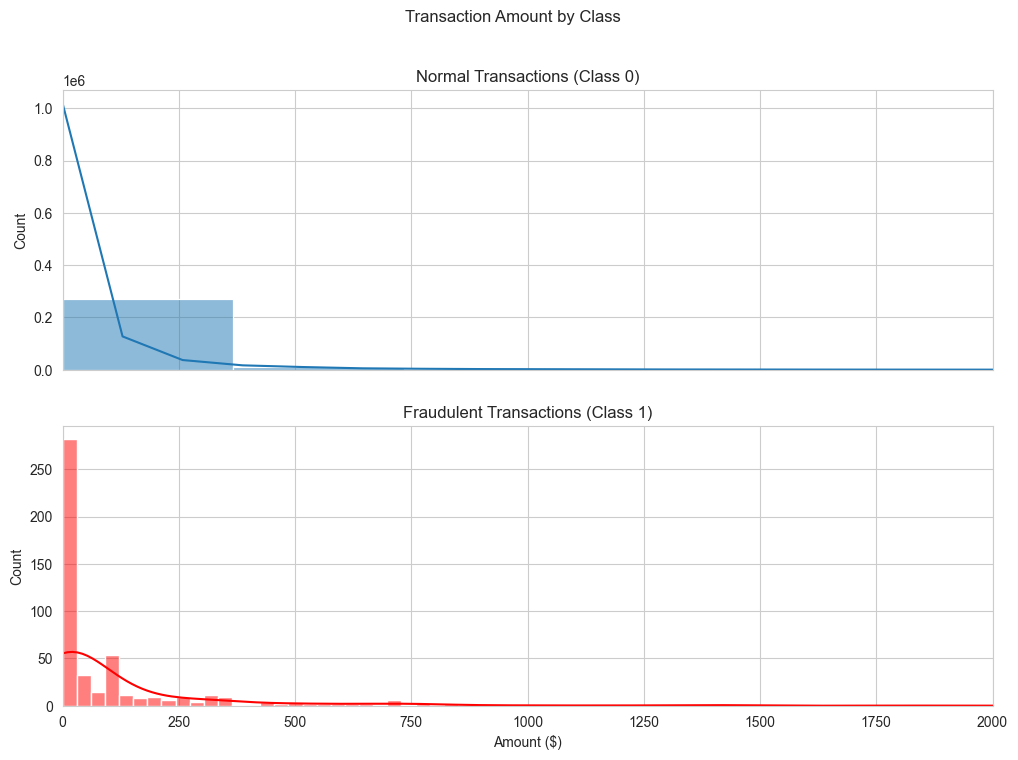


--- Visualizing Transaction Time for Normal vs. Fraud ---


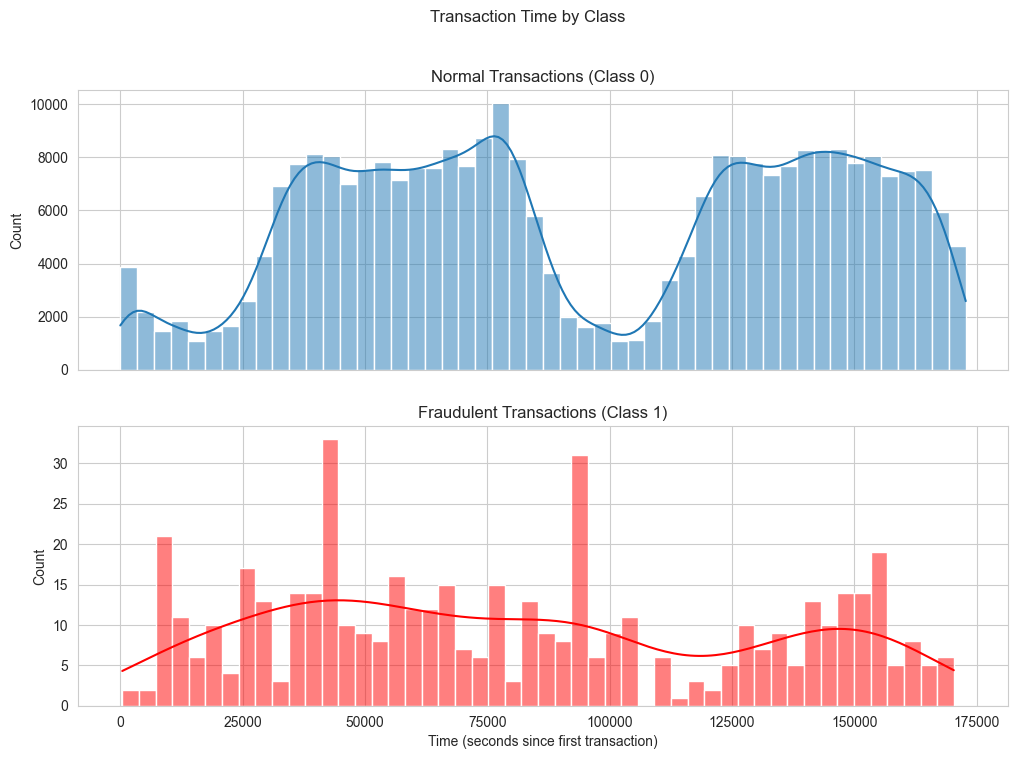

In [2]:
# Import our visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for our plots
sns.set_style('whitegrid')

# --- Plot 1: Show the Class Imbalance ---
print("--- Visualizing Class Imbalance ---")
plt.figure(figsize=(7, 5))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal | 1: Fraud)')
plt.show()

# --- Plot 2: Analyze Transaction Amount ---
print("\n--- Visualizing Transaction Amount for Normal vs. Fraud ---")
# We create two subplots, one for normal and one for fraud
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot for Normal Transactions (Class 0)
sns.histplot(df[df['Class'] == 0]['Amount'], bins=70, ax=ax1, kde=True)
ax1.set_title('Normal Transactions (Class 0)')
ax1.set(ylabel='Count')
# We limit the x-axis to 2000 to see the details, as some outliers are huge
ax1.set_xlim(0, 2000) 

# Plot for Fraudulent Transactions (Class 1)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=70, ax=ax2, kde=True, color='red')
ax2.set_title('Fraudulent Transactions (Class 1)')
ax2.set(xlabel='Amount ($)', ylabel='Count')
ax2.set_xlim(0, 2000)

plt.suptitle('Transaction Amount by Class')
plt.show()


# --- Plot 3: Analyze Transaction Time ---
print("\n--- Visualizing Transaction Time for Normal vs. Fraud ---")
# Create two subplots again
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot for Normal Transactions (Class 0)
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, ax=ax1, kde=True)
ax1.set_title('Normal Transactions (Class 0)')
ax1.set(ylabel='Count')

# Plot for Fraudulent Transactions (Class 1)
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, ax=ax2, kde=True, color='red')
ax2.set_title('Fraudulent Transactions (Class 1)')
ax2.set(xlabel='Time (seconds since first transaction)', ylabel='Count')

plt.suptitle('Transaction Time by Class')
plt.show()

In [3]:
# Import the StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# --- Scale the 'Amount' and 'Time' columns ---
# We use .values.reshape(-1, 1) because the scaler expects 2D data
df['scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# --- Create our final processed DataFrame ---
# We no longer need the original 'Time' and 'Amount' columns, so we drop them
# We also don't need the 'Class' column for the *input* features (X)
df_processed = df.drop(['Time', 'Amount'], axis=1)

# --- Display the first 5 rows of our fully processed data ---
print("--- Data After Scaling ---")
print(df_processed.head())

--- Data After Scaling ---
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  s

In [4]:
# --- Separate features (X) and the target (y) ---

# X contains all columns EXCEPT 'Class'
X = df_processed.drop('Class', axis=1)

# y contains ONLY the 'Class' column
y = df_processed['Class']

# --- Let's check the shape to confirm ---
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

Shape of X (features): (284807, 30)
Shape of y (target): (284807,)


In [5]:
# Import the IsolationForest model
from sklearn.ensemble import IsolationForest

# --- Set our contamination (fraud) rate ---
# This is the % of fraud we found in Step 3
contamination_rate = 492 / 284807
print(f"Using Contamination Rate: {contamination_rate:.5f}") # .5f = 5 decimal places

# --- 1. Create the model ---
# n_estimators=100 is a good default.
# contamination=auto is also good, but we have the exact number, so let's use it.
# random_state=42 ensures we get the same results every time we run it (good practice)
model = IsolationForest(
    n_estimators=100,
    contamination=contamination_rate,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores to speed it up
)

# --- 2. Train the model ---
print("\nTraining the model... (this may take a moment)")
model.fit(X)
print("Model trained successfully!")

# --- 3. Get predictions ---
# The model will predict on the same data it was trained on.
# This tells us which data points it "thinks" are anomalies.
predictions = model.predict(X)

print("Predictions generated.")

Using Contamination Rate: 0.00173

Training the model... (this may take a moment)
Model trained successfully!
Predictions generated.


In [6]:
# --- Format the model's predictions ---
# We'll add the predictions back to our main DataFrame to compare them
df['predicted_class'] = predictions

# Let's check the values
print("--- Raw Prediction Values (from Isolation Forest) ---")
print(df['predicted_class'].value_counts())

# --- Convert -1 (Fraud) to 1, and 1 (Normal) to 0 ---
df['predicted_class'] = df['predicted_class'].apply(lambda x: 1 if x == -1 else 0)

# --- Check our new, formatted values ---
# This number should be close to our original 492 fraud cases
print("\n--- Formatted Prediction Values (0: Normal, 1: Fraud) ---")
print(df['predicted_class'].value_counts())

--- Raw Prediction Values (from Isolation Forest) ---
predicted_class
 1    284315
-1       492
Name: count, dtype: int64

--- Formatted Prediction Values (0: Normal, 1: Fraud) ---
predicted_class
0    284315
1       492
Name: count, dtype: int64


--- Confusion Matrix ---
[[283959    356]
 [   356    136]]

--- Visual Confusion Matrix ---


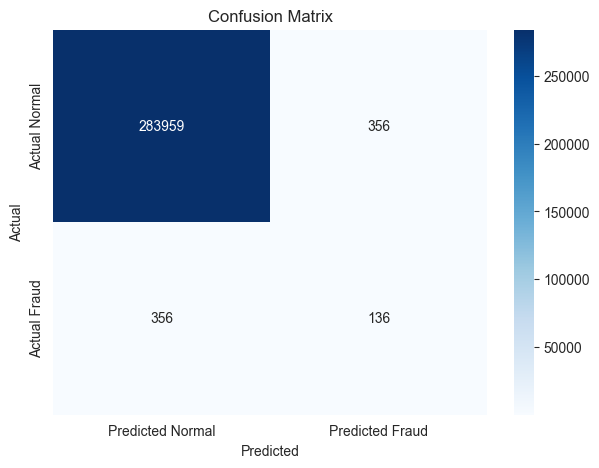


--- Classification Report ---
                  precision    recall  f1-score   support

Class 0 (Normal)       1.00      1.00      1.00    284315
 Class 1 (Fraud)       0.28      0.28      0.28       492

        accuracy                           1.00    284807
       macro avg       0.64      0.64      0.64    284807
    weighted avg       1.00      1.00      1.00    284807



In [7]:
# Import our evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Get the actual "ground truth" answers ---
y_actual = df['Class']

# --- 2. Get the model's predicted answers ---
y_predicted = df['predicted_class']

# --- 3. Generate and print the Confusion Matrix ---
print("--- Confusion Matrix ---")
# A confusion matrix 'cm' is structured like this:
# [ [True Negative (TN), False Positive (FP)],
#   [False Negative (FN), True Positive (TP)] ]
cm = confusion_matrix(y_actual, y_predicted)
print(cm)

# For a prettier print of the matrix
print("\n--- Visual Confusion Matrix ---")
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Normal', 'Predicted Fraud'], 
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# --- 4. Generate and print the Classification Report ---
print("\n--- Classification Report ---")
# This report gives us Precision, Recall, and F1-score
print(classification_report(y_actual, y_predicted, target_names=['Class 0 (Normal)', 'Class 1 (Fraud)']))

In [8]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# --- Split the data ---
# test_size=0.2 means 20% for testing, 80% for training
# stratify=y is CRITICAL for imbalanced data
# random_state=42 ensures we get the same "random" split every time
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# --- Check the shapes of our new data piles ---
print("--- Data Split Complete ---")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# --- Check the fraud % in our new piles (to prove stratify worked) ---
print(f"\nFraud cases in Training set: {sum(y_train)} ({(sum(y_train)/len(y_train)*100):.3f}%)")
print(f"Fraud cases in Testing set: {sum(y_test)} ({(sum(y_test)/len(y_test)*100):.3f}%)")

--- Data Split Complete ---
X_train shape: (227845, 30)
y_train shape: (227845,)
X_test shape: (56962, 30)
y_test shape: (56962,)

Fraud cases in Training set: 394 (0.173%)
Fraud cases in Testing set: 98 (0.172%)


In [9]:
# --- 1. Create a NEW model ---
# We use the same contamination rate as before
model_v2 = IsolationForest(
    n_estimators=100,
    contamination=contamination_rate,
    random_state=42,
    n_jobs=-1
)

# --- 2. Train the model *ONLY* on the training data ---
print("Training new model (v2) on 80% of data...")
model_v2.fit(X_train)
print("Model v2 trained successfully!")

# --- 3. Get predictions on the 20% "unseen" test data ---
print("Getting predictions on 20% (unseen) test data...")
y_pred_test = model_v2.predict(X_test)

# --- 4. Format the predictions (-1/1 to 0/1) ---
# 1 (Normal) becomes 0
# -1 (Fraud) becomes 1
y_pred_formatted = [1 if x == -1 else 0 for x in y_pred_test]

print("Predictions generated and formatted.")


Training new model (v2) on 80% of data...
Model v2 trained successfully!
Getting predictions on 20% (unseen) test data...
Predictions generated and formatted.


--- [HONEST SCORE] Confusion Matrix (Test Data) ---


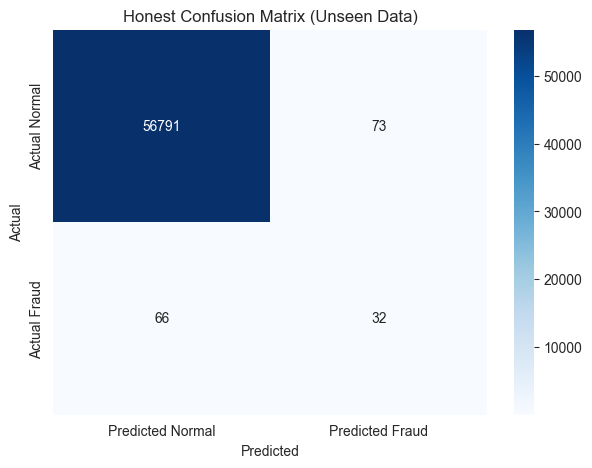


--- [HONEST SCORE] Classification Report (Test Data) ---
                  precision    recall  f1-score   support

Class 0 (Normal)       1.00      1.00      1.00     56864
 Class 1 (Fraud)       0.30      0.33      0.32        98

        accuracy                           1.00     56962
       macro avg       0.65      0.66      0.66     56962
    weighted avg       1.00      1.00      1.00     56962



In [10]:
# --- 1. Generate the new Confusion Matrix ---
print("--- [HONEST SCORE] Confusion Matrix (Test Data) ---")
cm_v2 = confusion_matrix(y_test, y_pred_formatted)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_v2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Honest Confusion Matrix (Unseen Data)')
plt.show()

# --- 2. Generate the new Classification Report ---
print("\n--- [HONEST SCORE] Classification Report (Test Data) ---")
print(classification_report(y_test, y_pred_formatted, target_names=['Class 0 (Normal)', 'Class 1 (Fraud)']))

In [11]:
# Install the library to save our model
# The '!' runs this as a terminal command
!pip install joblib

import joblib

# --- Save your "brain" (model_v2) to a file ---
# 'model_v2' is the model we trained on the split data
filename = 'fraud_detector_brain.joblib'
joblib.dump(model_v2, filename)

print(f"--- Model saved successfully as '{filename}'! ---")


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
--- Model saved successfully as 'fraud_detector_brain.joblib'! ---


In [12]:
# --- Step 5 (Revised): Preprocessing and Scaling ---
print("--- Running Step 5 (Revised) ---")

# Import the libraries we need
from sklearn.preprocessing import StandardScaler
import joblib 

# --- 1. Create ONE scaler for both Amount and Time ---
scaler = StandardScaler()

# --- 2. Fit the scaler on the 'Amount' and 'Time' columns ---
# We fit it on the original 'df' DataFrame
scaler.fit(df[['Amount', 'Time']])

# --- 3. Save this scaler to a file ---
# The 'tool' will need this file!
scaler_filename = 'scaler.joblib'
joblib.dump(scaler, scaler_filename)
print(f"--- Scaler saved successfully as '{scaler_filename}'! ---")

# --- 4. Transform the columns and add them to our DataFrame ---
df[['scaled_Amount', 'scaled_Time']] = scaler.transform(df[['Amount', 'Time']])

# --- 5. Create our final processed DataFrame ---
# Drop the original, un-scaled columns
df_processed = df.drop(['Time', 'Amount'], axis=1)

# --- Display the first 5 rows ---
print("\n--- Data After Scaling (with new scaler) ---")
print(df_processed.head())

--- Running Step 5 (Revised) ---
--- Scaler saved successfully as 'scaler.joblib'! ---

--- Data After Scaling (with new scaler) ---
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V23       V24       V25       V26  \
0  0.098698  0.363787  0.090794  ... -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425 -0.166974  ...  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  0.207643  ...  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024 -0.054952  ... -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.8

In [13]:
# --- Final Step: Save the "Brain" ---
print("--- Saving the trained model (model_v2)... ---")

# 'model_v2' is the model we trained on the split data (X_train, y_train)
filename = 'fraud_detector_brain.joblib'
joblib.dump(model_v2, filename)

print(f"--- Model saved successfully as '{filename}'! ---")
print("\nAll files are now saved. We are ready to build the tool.")

--- Saving the trained model (model_v2)... ---
--- Model saved successfully as 'fraud_detector_brain.joblib'! ---

All files are now saved. We are ready to build the tool.


In [14]:
# Install the library for SMOTE
!pip install imbalanced-learn



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [15]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

print("--- Applying SMOTE to the training data ---")

# --- Check the numbers *before* SMOTE ---
print(f"Shape of X_train (before): {X_train.shape}")
print(f"Fraud cases in y_train (before): {sum(y_train)} (Genuine: {len(y_train) - sum(y_train)})")

# --- Create the SMOTE object ---
# random_state=42 ensures we get the same "fake" data every time
smote = SMOTE(random_state=42)

# --- Apply SMOTE ---
# This creates new X and y data for training *only*
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\n--- SMOTE complete! ---")

# --- Check the numbers *after* SMOTE ---
print(f"Shape of X_train_smote (after): {X_train_smote.shape}")
print(f"Total cases in y_train_smote (after): {len(y_train_smote)}")
print(f"Fraud cases in y_train_smote (after): {sum(y_train_smote)} (Genuine: {len(y_train_smote) - sum(y_train_smote)})")# Import SMOTE
from imblearn.over_sampling import SMOTE

print("--- Applying SMOTE to the training data ---")

# --- Check the numbers *before* SMOTE ---
print(f"Shape of X_train (before): {X_train.shape}")
print(f"Fraud cases in y_train (before): {sum(y_train)} (Genuine: {len(y_train) - sum(y_train)})")

# --- Create the SMOTE object ---
# random_state=42 ensures we get the same "fake" data every time
smote = SMOTE(random_state=42)

# --- Apply SMOTE ---
# This creates new X and y data for training *only*
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\n--- SMOTE complete! ---")

# --- Check the numbers *after* SMOTE ---
print(f"Shape of X_train_smote (after): {X_train_smote.shape}")
print(f"Total cases in y_train_smote (after): {len(y_train_smote)}")
print(f"Fraud cases in y_train_smote (after): {sum(y_train_smote)} (Genuine: {len(y_train_smote) - sum(y_train_smote)})")

--- Applying SMOTE to the training data ---
Shape of X_train (before): (227845, 30)
Fraud cases in y_train (before): 394 (Genuine: 227451)

--- SMOTE complete! ---
Shape of X_train_smote (after): (454902, 30)
Total cases in y_train_smote (after): 454902
Fraud cases in y_train_smote (after): 227451 (Genuine: 227451)
--- Applying SMOTE to the training data ---
Shape of X_train (before): (227845, 30)
Fraud cases in y_train (before): 394 (Genuine: 227451)

--- SMOTE complete! ---
Shape of X_train_smote (after): (454902, 30)
Total cases in y_train_smote (after): 454902
Fraud cases in y_train_smote (after): 227451 (Genuine: 227451)


In [16]:
# Import our new model type
from sklearn.ensemble import RandomForestClassifier

print("--- Training new model (v3) on SMOTE data ---")

# Create the new model
# n_jobs=-1 uses all your computer's cores to make it faster
model_v3 = RandomForestClassifier(random_state=42, n_jobs=-1)

# --- Train the model on the *new balanced* data ---
# This is the important part: we use X_train_smote and y_train_smote
model_v3.fit(X_train_smote, y_train_smote)

print("--- Model v3 trained successfully! (This might take a minute) ---")

--- Training new model (v3) on SMOTE data ---
--- Model v3 trained successfully! (This might take a minute) ---



--- [HONEST SCORE - V3 with SMOTE + Random Forest] ---
                  precision    recall  f1-score   support

Class 0 (Normal)       1.00      1.00      1.00     56864
 Class 1 (Fraud)       0.81      0.81      0.81        98

        accuracy                           1.00     56962
       macro avg       0.91      0.90      0.90     56962
    weighted avg       1.00      1.00      1.00     56962

--- [HONEST SCORE - V3] Confusion Matrix (Test Data) ---


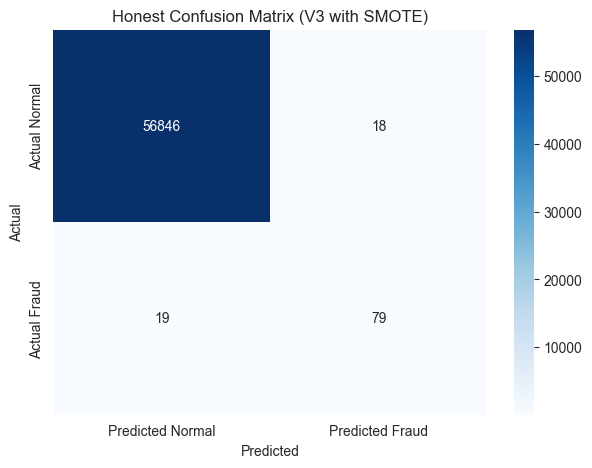

In [17]:
# Get predictions on the *original, unseen* test data (X_test)
y_pred_v3 = model_v3.predict(X_test)

# --- Generate the new Classification Report ---
print("\n--- [HONEST SCORE - V3 with SMOTE + Random Forest] ---")
print(classification_report(y_test, y_pred_v3, target_names=['Class 0 (Normal)', 'Class 1 (Fraud)']))

# --- Generate the new Confusion Matrix ---
print("--- [HONEST SCORE - V3] Confusion Matrix (Test Data) ---")
cm_v3 = confusion_matrix(y_test, y_pred_v3)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_v3, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Honest Confusion Matrix (V3 with SMOTE)')
plt.show()

In [18]:
# --- Final Step: Save the NEW "Brain" ---
print("--- Saving the new, smarter model (model_v3)... ---")

# The filename is the *same* as before. We are overwriting the old brain.
filename = 'fraud_detector_brain.joblib'
joblib.dump(model_v3, filename)

print(f"--- New brain saved successfully as '{filename}'! ---")

--- Saving the new, smarter model (model_v3)... ---
--- New brain saved successfully as 'fraud_detector_brain.joblib'! ---
